<a href="https://colab.research.google.com/github/binarymath/Studying_TensorFlow2/blob/main/TF2_0_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow

In [8]:
!pip install -q tensorflow-gpu==2.8.0rc0
import tensorflow as tf
print(tf.__version__)

2.8.0-rc0


In [10]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [11]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2918 - accuracy: 0.9167 - val_loss: 0.1422 - val_accuracy: 0.9582
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1426 - accuracy: 0.9576 - val_loss: 0.0999 - val_accuracy: 0.9698
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1087 - accuracy: 0.9664 - val_loss: 0.0887 - val_accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0894 - accuracy: 0.9719 - val_loss: 0.0823 - val_accuracy: 0.9758
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0762 - accuracy: 0.9756 - val_loss: 0.0752 - val_accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0660 - accuracy: 0.9789 - val_loss: 0.0754 - val_accuracy: 0.9775
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0589 - accuracy: 0.9812 - val_loss: 0.0769 - val_accuracy:

In [15]:
# Plot loss per iteration

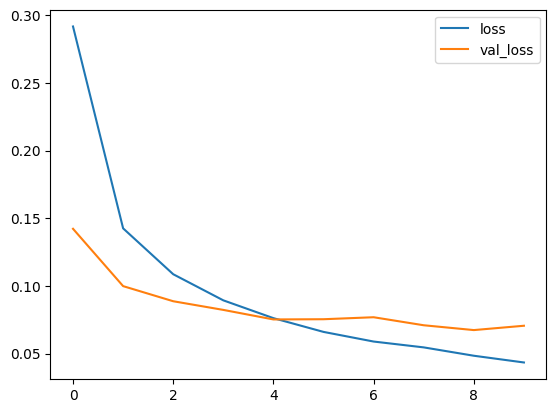

In [16]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [17]:
# Plot accuracy per iteration

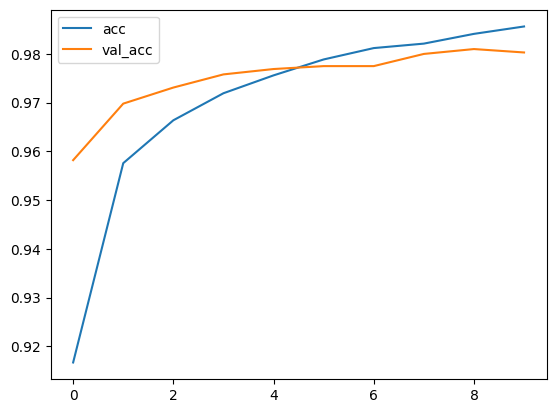

In [18]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [19]:
# Evaluate the model

In [20]:
print(model.evaluate(x_test,y_test ))

313/313 [==============================] - 1s 4ms/step - loss: 0.0706 - accuracy: 0.9803
[0.07058366388082504, 0.9803000092506409]


In [21]:
# Plot confusion matrix

Confusion matrix, without normalization
[[ 969    0    1    2    1    1    3    1    2    0]
 [   0 1123    3    1    0    0    2    1    5    0]
 [   2    2 1000    5    2    0    3    4   13    1]
 [   0    0    4  988    0    4    0    4    3    7]
 [   1    0    1    1  966    0    4    0    0    9]
 [   2    0    0    2    2  879    2    0    4    1]
 [   5    2    0    1    4    7  937    1    1    0]
 [   0    3    9    6    1    0    0 1002    2    5]
 [   3    1    1    5    4    2    2    3  949    4]
 [   1    3    0    1    7    2    1    2    2  990]]


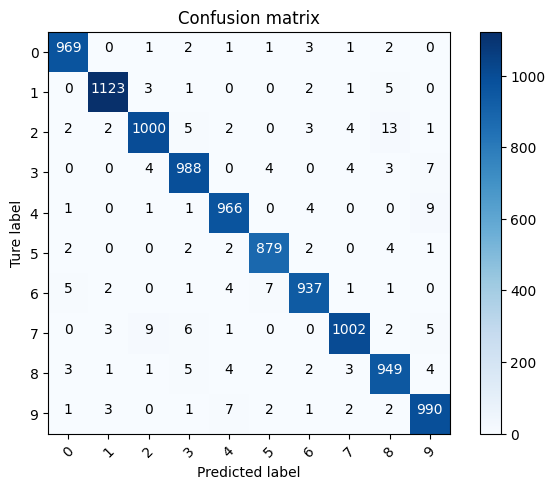

In [25]:
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """ 
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'.
  """

  if normalize:
    cm - cm.astype('float') / cm.sum(axis=1)[:,np.nowaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  tresh = cm.max() / 2. 
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
    horizontalalignment="center",
    color="white" if cm[i,j] > tresh else "black")

  plt.tight_layout()
  plt.ylabel('Ture label')
  plt.xlabel('Predicted label')
  plt.show

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense ?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7. etc.